In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning

## Homework 5: Putting it all together
### Associated lectures: All material till lecture 13

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment.
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments.

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other.
- Be respectful to each other and make sure you understand all the concepts in the assignment well.
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project:

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary.
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code.
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions.

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well.

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not.
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/).


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

We picked Option 1: Credit card defaults dataset

The dataset is of good size since there are 30000 examples. However, there is a clear sign of class imbalance, since the majority of the examples lead to non-defaults. The target column is a binary column, meaning that classification models like logistic regression / decision trees could be good candidates to perform machine learning on this dataset.


In [ ]:
data_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
data_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [ ]:
[train_set, test_set] = train_test_split(data_df, test_size=0.3, random_state=123)
X_train = train_set.drop(columns=["default.payment.next.month"])
y_train = train_set["default.payment.next.month"]
X_test = test_set.drop(columns=["default.payment.next.month"])
y_test = test_set["default.payment.next.month"]

print(X_train.describe())
print(y_train.value_counts(normalize=True) * 100)



            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    167880.651429      1.600762      1.852143      1.554000     35.500810   
std     130202.682167      0.489753      0.792961      0.521675      9.212644   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.015429     -0.137095     -0.171619     -0.225238     -0.264429   
std        1.120465      1.194506

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

**Summary statistics**:

- some examples have negative BILL_AMT values, which can indicate that they overpaid their balance during the previous month, or refunds occured, causing the balance owing to be negative. It might be a good idea to clip these negative values to 0, since negative balances (refunds etc) are often one-off occurences that may not be useful for predicting defaults.

- features that contain monetary values (Ex. BILL_AMT, PAY_AMT, LIMIT_BAL) have extremely wide value ranges and magnitudes compared to other non-monetary valued features (Ex.Age). Therefore, it might be a good idea to scale those columns to prevent monetary features from overpowering other features

**Visualizations(Check below cell for histograms)**:
- Frequency histogram of PAY_0 shows a clear separation between defaults & non-defaults. Clients who pay on time/delay payments less months (0-1 months delayed) tend to not default, while those who delay payments for longer (>= 2 months) are more likely to default.

- Frequency histogram of Age and sex does not show a clear separation between defaults and non-defaults. This could be an indication that age and sex may not play a significant role in predicting defaults.


**Choosing metrics**:

Since this is a binary classification problem where we want to maximize the prediction of true positives, and minimize the prediction of false positives, ROC_AUC can be good for evaluation metrics here, because it helps evaluate how effectively the model can rank actual defaulters higher than non-defaulters, regardless of any specific probability threshold used for classification. AUC is also good against datasets with class imbalance, like our dataset here.

balanced accuracy can also useful because it accounts for class imbalance and shows how well the model performs on both defaulters and non-defaulters

The default training/test accuracies(percentage of accurate predictions / # examples) are not super helpful here becuase the majority of the training dataset are non-defaults ( ~77% of examples are non-defaults). This means simply predicting the most frequent value would already give us a training accuracy of ~77%.

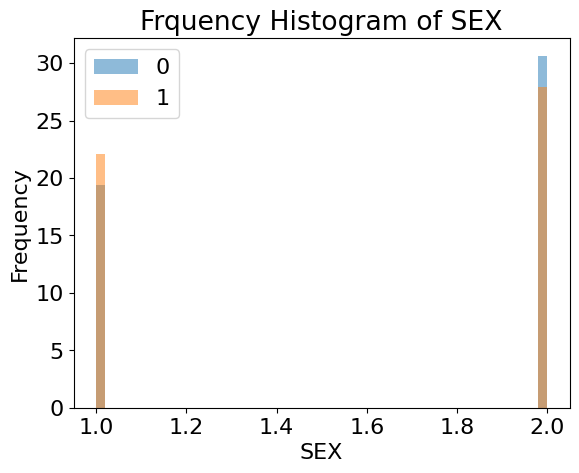

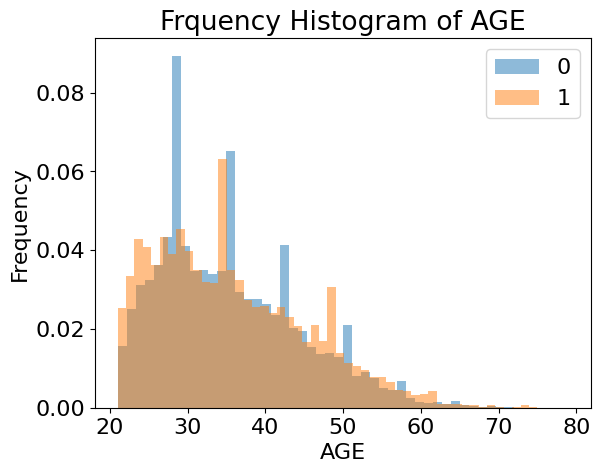

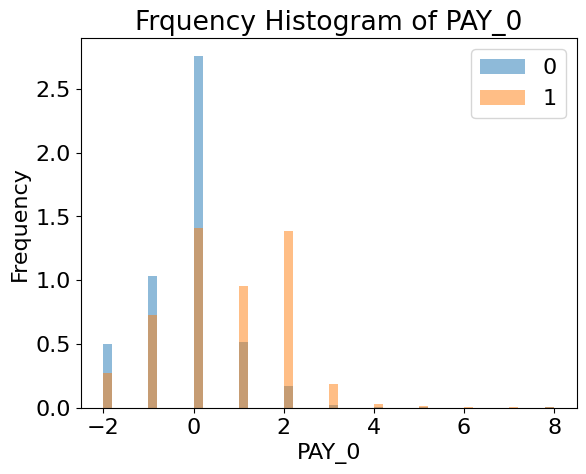

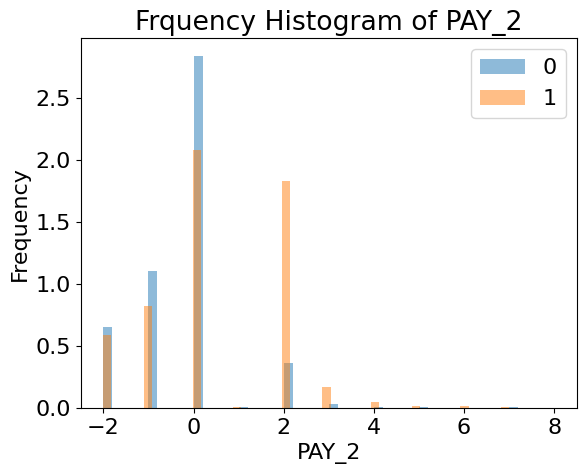

In [ ]:
for column in ['SEX', 'AGE', 'PAY_0', 'PAY_2']:
    train_set.groupby("default.payment.next.month")[column].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Frquency Histogram of " + column)
    plt.xlabel(column)
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

Possible new features:

- PAY_RATIO: obtained from PAY_AMT / BILL_AMT. Knowing what percentage of the bill the client paid for a billing month could be a useful metric. For instance, PAY_RATIO == 1.0 would indicate that the client paid 100% of the bill (paid in full). PAY_RATIO == 0 would indicate that the customer didn't pay the bill at all.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Row-wise feature engineering: create PAY_RATIO1..PAY_RATIO6
def add_pay_ratios(X: pd.DataFrame) -> pd.DataFrame:
    X = X.copy()
    for i in range(1, 7):
        bill = X[f"BILL_AMT{i}"]
        pay  = X[f"PAY_AMT{i}"]
        # define ratio only when bill > 0; otherwise 0 (no bill or credit balance)
        ratio = np.divide(pay, bill, out=np.zeros_like(pay, dtype=float), where=bill > 0)
        # clip ratio to be between 0 to 1
        X[f"PAY_RATIO{i}"] = np.clip(ratio, 0, 1)
    return X

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.

</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [ ]:
pay_features = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
ohe_features = ["EDUCATION", "MARRIAGE"]

binary_features = ["SEX"]


add_ratios = FunctionTransformer(add_pay_ratios, validate=False)

# created by add_ratios
ratio_features   = [f"PAY_RATIO{i}" for i in range(1,7)]

# pay_features (ordinal encoded columns) are scaled here just to prevent it from overpowering other numeric columns
numeric_features = ['LIMIT_BAL','AGE'] + ratio_features + pay_features


# BILL_AMT and PAY_AMT features are dropped here because we're replacing them with PAY_RATIO
drop_features = [f"BILL_AMT{i}" for i in range(1, 7)] + [f"PAY_AMT{i}"  for i in range(1, 7)]

In [ ]:
#Defines the appropriate Transformers
numerical_transformer  = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
binary_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical",   numerical_transformer,  numeric_features),
        ("categorical", categorical_transformer, ohe_features),
        ("binary",      binary_transformer,     binary_features),
        ("drop_unused", "drop",                 drop_features),
    ],
    remainder="drop"
)


In [ ]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'PAY_RATIO1',
                                  'PAY_RATIO2', 'PAY_RATIO3', 'PAY_RATIO4',
                                  'PAY_RATIO5', 'PAY_RATIO6', 'PAY_0', 'PAY_2',
                                  'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('binary',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['SEX']),
                                ('drop_unused', 'drop',
                                 ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [ ]:
# Baseline helpers
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, classification_report,
    confusion_matrix
)

In [ ]:
# helper function to generate a classification metrics report for the input model
# X_tr y_tr = the training X and y sets
# X_te y_te = the test X and y sets
def evaluate_clf(model, X_tr, y_tr, X_te, y_te, pos_label=1, name="Model"):
    """Fit on train, evaluate on test; returns a small metrics DataFrame."""
    model.fit(X_tr, y_tr)

    y_pred = model.predict(X_te)
    # proba is needed for ROC-AUC; if not available, fall back gracefully
    try:
        y_proba = model.predict_proba(X_te)[:, 1]
        roc = roc_auc_score(y_te, y_proba)
    except Exception:
        roc = np.nan

    metrics = {
        "model": name,
        "balanced_accuracy": balanced_accuracy_score(y_te, y_pred),
        "roc_auc_score": roc
    }
    print(f"\n=== {name} ===")
    print("Confusion matrix:\n", confusion_matrix(y_te, y_pred))
    return pd.DataFrame([metrics])

In [ ]:
dummy = DummyClassifier(strategy="most_frequent", random_state=123)
mf_df = evaluate_clf(dummy, X_train, y_train, X_test, y_test, name="Dummy (most_frequent)")
mf_df


=== Dummy (most_frequent) ===
Confusion matrix:
 [[7052    0]
 [1948    0]]


,model,balanced_accuracy,roc_auc_score
0,Dummy (most_frequent),0.5,0.5


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter.

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

logreg_base = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", LogisticRegression(C=1.0,
        max_iter=2000, class_weight="balanced"
    ))
])

scoring = {
    "roc_auc": "roc_auc",
    "balanced_accuracy": "balanced_accuracy"
}



In [ ]:
#Evaluate with cross-validation (multi-metric)
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd


cv = cross_validate(
    logreg_base,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

cv_df = pd.DataFrame(cv)
summary = cv_df.agg(["mean", "std"]).T.sort_values(by="mean", ascending=False)
display(summary)

# ROC-AUC: “ranking power”—how well the model ranks defaulters above non-defaulters.
# Balanced accuracy: deals with imbalance (avg of TPR and TNR).


,mean,std
test_roc_auc,0.717006,0.008815
test_balanced_accuracy,0.669806,0.004547
fit_time,0.182982,0.042080
score_time,0.063204,0.011485


In [ ]:
# Hyperparameter tuning
# We’ll sweep C (regularization strength): smaller C = more regularization, larger C = less.
# We're optimizing primarily for ROC-AUC

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import scipy.stats as stats

pipe_for_search = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

param_dist = {
    "model__C": stats.loguniform(1e-3, 1e2)  # sample from continuous log range
}

rs = RandomizedSearchCV(
    estimator=pipe_for_search,
    param_distributions=param_dist,
    n_iter=40,
    scoring=scoring,
    refit='roc_auc',
    cv=5,
    random_state=123,
    n_jobs=-1,
)


rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Best CV ROC-AUC:", rs.best_score_)


Best params: {'model__C': np.float64(2.6555145964210745)}
Best CV ROC-AUC: 0.71699616456178


In [ ]:
# Final “linear model” report for the section (train-only CV)

from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

best_C = float(rs.best_params_["model__C"])
print(f"Using best C from RandomizedSearchCV: {best_C:.6f}")

# Freeze the best linear model (same pipeline structure, just set C)
logreg_final = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", LogisticRegression(
        C=best_C,
        max_iter=2000,
        class_weight="balanced"
    ))
])

# Cross-validate (train only) with multiple metrics for a tidy summary
cv = cross_validate(
    logreg_final,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1,
)

cv_df = pd.DataFrame(cv)
summary = cv_df.agg(["mean", "std"]).T
summary.index = [f"cv_{m}" for m in summary.index]  # prettier row names
display(summary)


Using best C from RandomizedSearchCV: 2.655515


,mean,std
cv_fit_time,0.180651,0.029160
cv_score_time,0.064065,0.012257
cv_test_roc_auc,0.716996,0.008819
cv_test_balanced_accuracy,0.669698,0.004269


We trained a logistic regression model with full preprocessing (add ratios, scaling, and one-hot encoding) and used `class_weight="balanced"` to address the class imbalance.

The base logistic regression model with ( C=1.0 ) achieved about **ROC-AUC = 0.717** and **balanced accuracy = 0.669**, already outperforming dummy baselines. We then tuned C using RandomizedSearchCV over a log-uniform range from (10^{-3}) to (10^{2}) (40 samples, 5-fold CV, scoring by ROC-AUC) and found the best value around C = 2.65.

The final 5-fold CV results were stable with ROC-AUC ≈ 0.7169, balanced accuracy ≈ 0.669 with significantly small standard deviations between CV folds, meaning that the model's performance is fairly consistent.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

models = {
    "RandomForest": RandomForestClassifier(random_state=123, n_jobs=-1
    ),
    # "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        use_label_encoder=False,
        random_state=123,
        n_jobs=-1
    ),
    # "SVC_RBF": SVC(kernel="rbf", class_weight="balanced")
    "GradientBoost": GradientBoostingClassifier(random_state=123)
}

In [ ]:
results = {}

scoring = {
    "roc_auc": "roc_auc",
    "balanced_accuracy": "balanced_accuracy",
}
for name, model in models.items():
    pipe = Pipeline([
        ("add_ratios", add_ratios),
        ("prep", preprocessor),
        ("model", model)
    ])
    cv = cross_validate(
        pipe, X_train, y_train,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
    results[name] = pd.DataFrame(cv).agg(["mean", "std"]).T

In [ ]:
import numpy as np
import pandas as pd

def tidy_cv(results_dict):
    rows = []
    for name, df in results_dict.items():
        if "mean" in df.columns:
            m = df["mean"]
        else:
            m = pd.Series(df).mean()

        rows.append({
            "model": name,
            "fit_time": float(m.get("fit_time", np.nan)),
            "score_time": float(m.get("score_time", np.nan)),
            "test_roc_auc": float(m.get("test_roc_auc", np.nan)),
            "train_roc_auc": float(m.get("train_roc_auc", np.nan)),
            "test_bal_acc": float(m.get("test_balanced_accuracy", np.nan)),
            "train_bal_acc": float(m.get("train_balanced_accuracy", np.nan))
        })

    tidy = (pd.DataFrame(rows)
            .sort_values("test_roc_auc", ascending=False)
            .reset_index(drop=True))
    return tidy

tidy = tidy_cv(results)
display(tidy)


,model,fit_time,score_time,test_roc_auc,train_roc_auc,test_bal_acc,train_bal_acc
0,GradientBoost,9.139533,0.079231,0.775131,0.798640,0.660096,0.672409
1,RandomForest,8.014526,0.384195,0.753077,0.999994,0.658868,0.998422
2,XGBoost,0.666221,0.111818,0.750223,0.955482,0.650363,0.786588


### **Comparison and Interpretation**

Among the three non-linear models, in terms of roc_auc, the **GradientBoost** performed best, achieving a validation roc_auc of **0.775** and balanced accuracy of **0.660**, greatly outperforming the linear model (~0.717 CV roc_auc, ~0.669 balanced accuracy). However, it also had the longest fit time.

The **Random Forest** came second (ROC-AUC = **0.753**, balanced_accuracy = **0.6588**) but showed clear **overfitting**. Its training roc_auc was nearly perfect (**0.999**) while test performance significantly dropped. It trained faster but it took longer to predict compared to other models.

The **XGBoost** model came third in terms of performance(roc_auc = **0.750**, balanced accurracy = **0.650**), but it had the fastest fit time.

Overall, all three non-linear ensemble models were **able to outperform logistic regression**, even before any hyperparameter tuning. This suggests that we should use a non-linear model for our final evaluation against the test set.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Reuse preprocessor from before
logreg_for_fs = LogisticRegression(max_iter=2000, class_weight="balanced")

# Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(
    estimator=logreg_for_fs,
    cv=10,
    scoring="roc_auc",
    n_jobs=-1
)


In [ ]:
pipe_fs = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("feature_select", rfecv),
    ("model", logreg_for_fs)
])

In [ ]:

# Evaluate with CV
cv_res = cross_validate(pipe_fs, X_train, y_train, cv=5, scoring=scoring)
print(f"[Feature Selection] CV ROC-AUC: {cv_res['test_roc_auc'].mean():.5f} | CV Balanced Acc: {cv_res['test_balanced_accuracy'].mean():.5f}")


[Feature Selection] CV ROC-AUC: 0.71741 | CV Balanced Acc: 0.67061


I applied RFECV with logistic regression using the same preprocessing pipeline. The cross-validation results were **ROC_AUC = 0.717 and balanced accuracy = 0.670**, which are near identical to the baseline linear model. This suggests that feature selection didn’t necessarily improve performance. Logistic regression’s regularization likely already handled irrelevant or redundant features, so removing features didn’t change the outcome.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

# Small helper: turn a fitted SearchCV object into a single-row summary
def summarize_search(name, search):
    """Return one row with model name, best params, and CV means for timing/scores."""
    cv = search.cv_results_
    row = {
        "model": name,
        "best_params": search.best_params_,
        "fit_time": float(cv["mean_fit_time"][search.best_index_]),
        "score_time": float(cv["mean_score_time"][search.best_index_]),
        "val_roc_auc_score": float(cv["mean_test_roc_auc"][search.best_index_]),
        "train_roc_auc_score": float(cv.get("mean_train_roc_auc", [np.nan])[search.best_index_]),
        "val_balanced_accuracy": float(cv["mean_test_balanced_accuracy"][search.best_index_]),
        "train_balanced_accuracy": float(cv.get("mean_train_balanced_accuracy", [np.nan])[search.best_index_]),
    }
    return row


In [ ]:
# Logistic Regression tuning

from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", LogisticRegression(
        max_iter=2000, class_weight="balanced"
    )),
])

logreg_dist = {
    "model__C": stats.loguniform(1e-3, 1e2),  # 0.001 … 100
}

logreg_search = RandomizedSearchCV(
    estimator=logreg_pipe,
    param_distributions=logreg_dist,
    n_iter=10,
    scoring=scoring,
    refit="roc_auc",
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    random_state=123
)

logreg_search.fit(X_train, y_train)
logreg_row = summarize_search("LogisticRegression", logreg_search)
logreg_row


{'model': 'LogisticRegression',
 'best_params': {'model__C': np.float64(2.6555145964210745)},
 'fit_time': 0.18487229347229003,
 'score_time': 0.07110886573791504,
 'val_roc_auc_score': 0.71699616456178,
 'train_roc_auc_score': 0.7188119154257295,
 'val_balanced_accuracy': 0.6696975928332989,
 'train_balanced_accuracy': 0.6710014694042972}

In [ ]:
#RandomForest tuning

from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),  # NOTE: RF doesn't *need* scaling, but leaving it in keeps the pipeline consistent
    ("model", RandomForestClassifier(random_state=123, n_jobs=-1)),
])

rf_dist = {
    "model__n_estimators": stats.randint(200, 800),            # trees
    "model__max_depth": stats.randint(5, 30),                  # depth cap
    "model__max_features": ["sqrt", "log2", 0.3, 0.5, 1.0],    # feature subsampling
}

# find the best parameters that maximize roc_auc
rf_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_dist,
    n_iter=5,
    scoring=scoring,
    refit='roc_auc',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    random_state=123,
    verbose=0,
)

rf_search.fit(X_train, y_train)
rf_row = summarize_search("RandomForest", rf_search)
rf_row


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'model': 'RandomForest',
 'best_params': {'model__max_depth': 11,
  'model__max_features': 'log2',
  'model__n_estimators': 795},
 'fit_time': 32.18898468017578,
 'score_time': 1.7507005691528321,
 'val_roc_auc_score': 0.7759785499978117,
 'train_roc_auc_score': 0.8803540404574891,
 'val_balanced_accuracy': 0.6583412925685124,
 'train_balanced_accuracy': 0.733209887134467}

In [ ]:
#XGBoost tuning
xgb_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        use_label_encoder=False,
        random_state=123
    ))
])

# Define a randomized search space
xgb_dist = {
    "model__n_estimators": stats.randint(100, 500),
    "model__max_depth": stats.randint(3, 10),
    "model__learning_rate": stats.loguniform(0.01, 0.3),
    "model__subsample": stats.uniform(0.6, 0.4),
    "model__colsample_bytree": stats.uniform(0.6, 0.4),
    "model__gamma": stats.uniform(0, 5)
}

scoring = {
    "roc_auc": "roc_auc",
    "balanced_accuracy": "balanced_accuracy"
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=xgb_dist,
    n_iter=5,
    scoring=scoring,
    refit="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=42,
    return_train_score=True
)

xgb_search.fit(X_train, y_train)

xgb_row = summarize_search("XGBoost", xgb_search)
xgb_row

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:53:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'model': 'XGBoost',
 'best_params': {'model__colsample_bytree': np.float64(0.749816047538945),
  'model__gamma': np.float64(4.75357153204958),
  'model__learning_rate': np.float64(0.1205712628744377),
  'model__max_depth': 7,
  'model__n_estimators': 120,
  'model__subsample': np.float64(0.6624074561769746)},
 'fit_time': 0.462106990814209,
 'score_time': 0.09261846542358398,
 'val_roc_auc_score': 0.7761155668596293,
 'train_roc_auc_score': 0.815705581921119,
 'val_balanced_accuracy': 0.6605336379491438,
 'train_balanced_accuracy': 0.6770684219275601}

In [ ]:
#GradientBooost tuning
gb_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", GradientBoostingClassifier(random_state=123))
])

gb_dist = {
    "model__n_estimators": stats.randint(100, 400),        # number of trees
    "model__learning_rate": stats.loguniform(0.01, 0.3),   # step size
    "model__max_depth": stats.randint(2, 6),               # tree depth
    "model__subsample": stats.uniform(0.6, 0.4),           # fraction of samples per tree
    "model__min_samples_split": stats.randint(2, 20),      # min samples to split
    "model__min_samples_leaf": stats.randint(1, 10),       # min samples per leaf
}

gb_search = RandomizedSearchCV(
    estimator=gb_pipe,
    param_distributions=gb_dist,
    n_iter=5,
    scoring=scoring,
    refit="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=123,
    return_train_score=True
)

gb_search.fit(X_train, y_train)

gb_row = summarize_search("Gradient Boost", gb_search)
gb_row

{'model': 'Gradient Boost',
 'best_params': {'model__learning_rate': np.float64(0.053142528628114936),
  'model__max_depth': 3,
  'model__min_samples_leaf': 7,
  'model__min_samples_split': 3,
  'model__n_estimators': 196,
  'model__subsample': np.float64(0.831877718809044)},
 'fit_time': 15.863724851608277,
 'score_time': 0.12165398597717285,
 'val_roc_auc_score': 0.7760546366807257,
 'train_roc_auc_score': 0.8015208531523736,
 'val_balanced_accuracy': 0.6605947036819083,
 'train_balanced_accuracy': 0.6722588307804134}

In [ ]:
#Combine summaries into one tidy comparison table
results_df = pd.DataFrame([logreg_row, rf_row, xgb_row, gb_row])
results_df = results_df.sort_values("val_roc_auc_score", ascending=False).reset_index(drop=True)


cols = ["model", "fit_time", "score_time", "val_roc_auc_score", "train_roc_auc_score","val_balanced_accuracy", "train_balanced_accuracy", "best_params"]
display(results_df[cols])


,model,fit_time,score_time,val_roc_auc_score,train_roc_auc_score,val_balanced_accuracy,train_balanced_accuracy,best_params
0,XGBoost,0.462107,0.092618,0.776116,0.815706,0.660534,0.677068,"{'model__colsample_bytree': 0.749816047538945,..."
1,Gradient Boost,15.863725,0.121654,0.776055,0.801521,0.660595,0.672259,"{'model__learning_rate': 0.053142528628114936,..."
2,RandomForest,32.188985,1.750701,0.775979,0.880354,0.658341,0.733210,"{'model__max_depth': 11, 'model__max_features'..."
3,LogisticRegression,0.184872,0.071109,0.716996,0.718812,0.669698,0.671001,{'model__C': 2.6555145964210745}


In [ ]:
# Reflection scaffold (fills in numbers from the table above)
best = results_df.iloc[0]
print(
    f"Winner after tuning: {best['model']} | "
    f"ROC-AUC (CV mean) = {best['val_roc_auc_score']:.3f} | "
    f"train = {best['train_roc_auc_score']:.3f} | "
    f"fit_time ≈ {best['fit_time']:.3f}s | score_time ≈ {best['score_time']:.3f}s\n"
    f"Best params: {best['best_params']}"
)

Winner after tuning: XGBoost | ROC-AUC (CV mean) = 0.776 | train = 0.816 | fit_time ≈ 0.462s | score_time ≈ 0.093s
Best params: {'model__colsample_bytree': np.float64(0.749816047538945), 'model__gamma': np.float64(4.75357153204958), 'model__learning_rate': np.float64(0.1205712628744377), 'model__max_depth': 7, 'model__n_estimators': 120, 'model__subsample': np.float64(0.6624074561769746)}


After hyperparameter tuning,

 **XGBoost** has noticeable improvements as its roc_auc went from 0.7502 to 0.7761, and its balanced accuracy went from 0.6503 to 0.6605.

**Random Forest** also showed changes as its roc_auc went from roc_auc = 0.7530 to 0.7759, but its balanced_accuracy went from 0.6588 to 0.6583.

**GradientBoost** had negligible improvements on its roc_auc as it went from 0.7751 to 0.7760, and its balanced accuracy remained almost unchanged.

**Logistic Regression** roc_auc went from 0.7170 to 0.71699 and balanced accuracy went from 0.6698 to 0.6697, which shows that it didn't improve drastically after hyperparameter tuning.


XGBoost, Random Forest, and Gradient boost all share similar roc_auc scores after. However, Since **XGBoost has the highest roc_auc and balanced accuracy overall, it will be declared as the best-performing model of all 4 models**.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

In [ ]:
# Import interpretation tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

In [ ]:
# Using the best hyperparameters found from the tuning step
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators=795,
    max_depth=11,
    max_features='log2',
    random_state=123,
    n_jobs=-1
)

In [ ]:
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("preprocessor", preprocessor),
    ("model", best_rf)
])

In [ ]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('add_ratios',
                 FunctionTransformer(func=<function add_pay_ratios at 0x7ce769932f20>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'PAY_RATIO1', 'PAY_RATIO2',
                                                   'PAY_RATIO3', 'PAY_RATIO4',
                                                   'PAY_RATIO5', 'PAY_RATIO6',
                                                   'PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5',...
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['SEX']),
                                                 ('drop_unused', 'drop',
                                                  ['BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6'])])),
                ('model',
                 RandomForestClassifier(max_depth=11, max_features='log2',
                                        n_estimators=795, n_jobs=-1,
                                        random_state=123))])

In [ ]:
# Extract final feature names from ColumnTransformer
feature_names = rf_pipe.named_steps["preprocessor"].get_feature_names_out()
feature_names = np.append(feature_names, "PAY_RATIO")
len(feature_names)

27

In [ ]:
# 1) Get the transformer that feeds the model
prep = rf_pipe[:-1]

# 2) Get the transformed feature matrix shape
Xt = prep.transform(X_train)
n_transformed = Xt.shape[1]

preproc = rf_pipe.named_steps["preprocessor"]
feature_names = preproc.get_feature_names_out()
importances = rf_pipe.named_steps["model"].feature_importances_

rf_importances = (
    pd.DataFrame({"Feature": feature_names, "Importance": importances})
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)
rf_importances.head(10)


,Feature,Importance
0,numerical__PAY_0,0.230306
1,numerical__PAY_2,0.113239
2,numerical__PAY_3,0.074730
3,numerical__LIMIT_BAL,0.058249
4,numerical__PAY_RATIO1,0.054112
5,numerical__PAY_4,0.051856
6,numerical__PAY_5,0.050795
7,numerical__AGE,0.048780
8,numerical__PAY_RATIO3,0.047375
9,numerical__PAY_RATIO2,0.046799


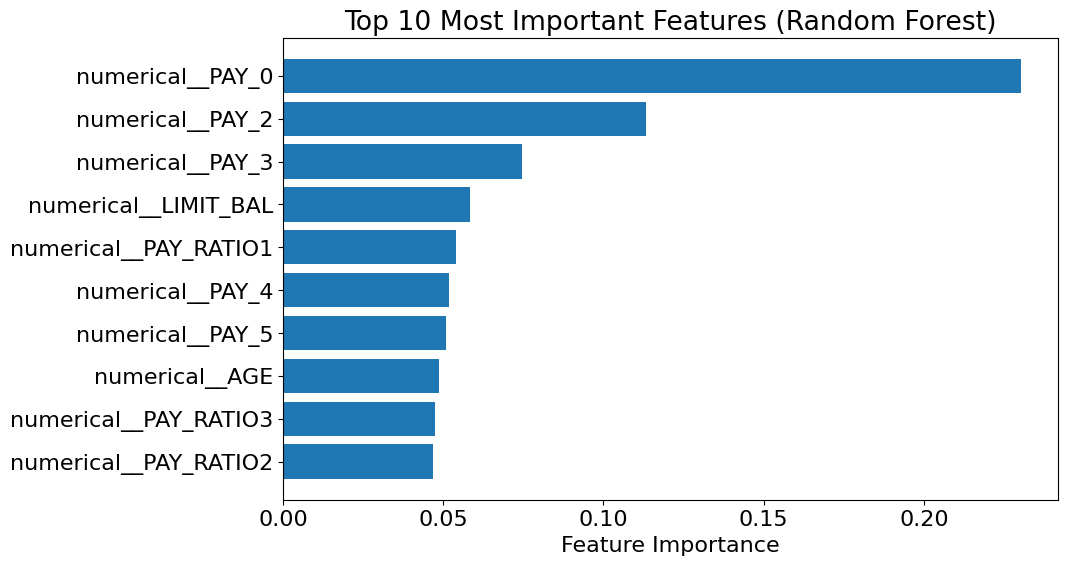

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(rf_importances["Feature"].head(10)[::-1], rf_importances["Importance"].head(10)[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import scipy.sparse as sp

# 1) prep and names (unchanged)
prep = rf_pipe[:-1]
Xt = prep.transform(X_train)

# make dense for permutation_importance
if sp.issparse(Xt):
    Xt = Xt.toarray()   # ~21k x 84 => ~14 MB in float64, fine for RAM

# names from the ColumnTransformer
ct = rf_pipe.named_steps["preprocessor"]
feat_names_expanded = ct.get_feature_names_out()

# 2) permutation importance on the fitted RF (the last step)
perm = permutation_importance(
    rf_pipe.named_steps["model"],
    Xt, y_train,
    n_repeats=5,
    random_state=123,
    scoring="roc_auc",
)

# 3) tidy table
perm_df = (
    pd.DataFrame({
        "Feature": feat_names_expanded,
        "MeanDecreaseAUC": perm.importances_mean
    })
    .sort_values(by="MeanDecreaseAUC", ascending=False)
    .reset_index(drop=True)
)

display(perm_df.head(10))


,Feature,MeanDecreaseAUC
0,numerical__PAY_0,0.078675
1,numerical__LIMIT_BAL,0.041662
2,numerical__PAY_2,0.030580
3,numerical__PAY_RATIO1,0.029418
4,numerical__PAY_RATIO3,0.025362
5,numerical__PAY_3,0.023764
6,numerical__PAY_RATIO2,0.023488
7,numerical__PAY_RATIO4,0.021234
8,numerical__PAY_RATIO5,0.020418
9,numerical__PAY_4,0.018204


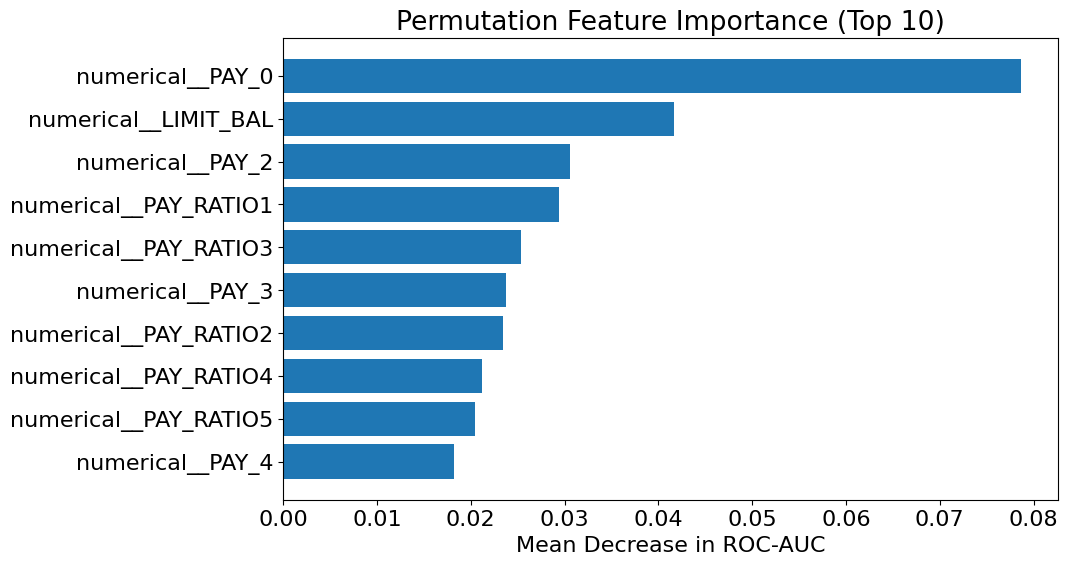

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(perm_df["Feature"].head(10)[::-1], perm_df["MeanDecreaseAUC"].head(10)[::-1])
plt.xlabel("Mean Decrease in ROC-AUC")
plt.title("Permutation Feature Importance (Top 10)")
plt.show()

In [ ]:
# Merge the two ranking methods
combined_importances = rf_importances.merge(perm_df, on="Feature", how="inner")
combined_importances.rename(columns={"Importance":"ModelImportance"}, inplace=True)
combined_importances.head(10)

,Feature,ModelImportance,MeanDecreaseAUC
0,numerical__PAY_0,0.230306,0.078675
1,numerical__PAY_2,0.113239,0.030580
2,numerical__PAY_3,0.074730,0.023764
3,numerical__LIMIT_BAL,0.058249,0.041662
4,numerical__PAY_RATIO1,0.054112,0.029418
5,numerical__PAY_4,0.051856,0.018204
6,numerical__PAY_5,0.050795,0.015664
7,numerical__AGE,0.048780,0.017318
8,numerical__PAY_RATIO3,0.047375,0.025362
9,numerical__PAY_RATIO2,0.046799,0.023488


After tuning and refitting the Random Forest, I analyzed feature importances using both the model’s built-in importance scores and permutation importance. Both methods highlighted **payment history and balance features** as the strongest predictors of default, particularly `PAY_0`, `PAY_2`, `PAY_3` and `LIMIT_BAL`. These reflect recent payment behavior for the past 1-3 months and available credit, which logically drive repayment likelihood. The `PAY_RATIO` features also ranked consistently high, showing that the percentage of the bill paid for each month also plays a key role. The agreement between the two interpretation methods suggests that the model’s learned patterns align with meaningful, interpretable financial factors rather than random noise.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
# apply XGBoost to test data
# xgb_search is currently fitted using the best hyperparameters

y_pred_proba = xgb_search.predict_proba(X_test)[:, 1]

# Predict class labels
y_pred = xgb_search.predict(X_test)

# Compute roc_auc and balanced accuracy
roc_auc = roc_auc_score(y_test, y_pred_proba)
bal_acc = balanced_accuracy_score(y_test, y_pred)



In [ ]:
print("Test roc_auc score: " + str(roc_auc))
print("Test balance accuracy score: " + str(bal_acc))

Test roc_auc score: 0.7756862413097891
Test balance accuracy score: 0.6609494328432611


 The XGBoost ensemble had a **mean validation roc_auc score of 0.7759 and a mean validation balanced accuracy of 0.6583**. When predicting against the test set, the model had a **test roc_auc score of 0.7756 and a balanced accuracy of 0.6609**.

the validation and test roc_auc are extremely close, which gives me confidence that the validation scores were a good proxy to how well the model would perform against the test set, and that the model is able to generalize well to unseen data.

I think that optimization bias could still be present in this case, but we did the best we could to minimize it. For instance, we made sure to use RandomizedSearchCV to add randomness to the hyperparameters and is less exhaustive than GridSearch. We also made sure to limit n_iterations to limit the number of combinations we try.

In [ ]:
!pip install eli5

In [ ]:
#TODO: Use SHAP force plots to explain test predictions

import eli5
from eli5.sklearn import PermutationImportance
import numpy as np
import matplotlib.pyplot as plt


xgb_pipe = xgb_search.best_estimator_

# Prepare a single row from test data
X_test_trans = xgb_pipe.named_steps["prep"].transform(
    xgb_pipe.named_steps["add_ratios"].transform(X_test)
)
feature_names = xgb_pipe.named_steps["prep"].get_feature_names_out()

# test example for predicting non-default
idx = 0  # for example
eli5.show_prediction(
    xgb_pipe.named_steps["model"],
    X_test_trans[idx],
    feature_names=feature_names,
    show_feature_values=True
)

/usr/local/lib/python3.12/dist-packages/eli5/xgboost.py:153: UserWarning: This explanation might be incoorrect, only xgboost < 2.0.0 is known to work correctly
  warnings.warn(


For the first test example, **XGBoost predicted non-default (0)**. This prediction was mainly driven by the **value of PAY_0**, which indicates the payment status for the most recent month. PAY_0 is scaled and is -0.879 here, which means that the actual PAY_0 value is **0.879 standard deviations below the mean PAY_0 value**. This likely means that the individual had minimal payment delays for the most recent month. This feature contributed heavily towards why XGboost decided to predict non-default.

In [ ]:
# test example for predicting default
idx = 2

eli5.show_prediction(
    xgb_pipe.named_steps["model"],
    X_test_trans[idx],
    feature_names=feature_names,
    show_feature_values=True
)

2


/usr/local/lib/python3.12/dist-packages/eli5/xgboost.py:153: UserWarning: This explanation might be incoorrect, only xgboost < 2.0.0 is known to work correctly
  warnings.warn(


For the second test example, XGBoost decided to **predict default (y=1)**, which was strongly driven by the same feature column, **PAY_0**. This time, the person's actual PAY_0 value was** 1.799 standard deviations ABOVE the mean PAY_0 value**. This means that the individual likely **delayed their most recent month's payment for many months**. This strongly signaled to XGBoost that the individual will likely default on their next payment, causing it to predict default.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

1.

This project compared the performances of 4 models, Logistic Regression, Random Forest, XGBoost, and Gradient Boost.

Using roc_auc as a scoring metric, XGBoost performs the best with an **roc_auc of 0.7756**. This score means that 77.56% of the time, a randomly chosen defaulter will have a higher probability of being classified as default than a randomly chosen non-defaulter.

With the random forest model, we find that the repayment status for the** most recent 1-3 months(PAY_0, PAY_2, PAY_3)** have the **most impact** on deciding whether or not a person will default on the next payment. Beyond those 3 features, other numerical features like **LIMIT_BAL and PAY_RATIO** also seem to play a noticeable role in affecting the credit default prediction of the model.


2.

What worked well in this project was that we had **sufficient amounts of data** such that we were able to have large enough validation folds to have efficient cross validations, as well as a large enough test set to gauge how the model will perform against wild data. What also worked well was that the majority of the features are relevant towards the problem, so the model was able to learn meaningful patterns without needing to throw away columns that could be deemed irrelevant or noise.

What did not work well for us was **how long it took to fit/cross validate some models**. Originally, we wanted to use KNN as one of the models, but KNN was taking a significantly amount of time during cross validations and hyperparemeter tuning to the point where it was too slow and difficult to use for this assignment. This was sort of expected, because KNN scales badly with the number of features, and we did create a good amount of new feature columns from one-hot encoding.


3.
In terms of performance, since many of the models we tried are non-linear ensemble models, it might be worth a shot to try other non-linear models like SVM RBF, because they could potentially perform well also.

In terms of interpretability, another way we could've interpreted feature importances is through logistic regression, where we could've looked at the coefficient magnitudes of each feature to determine the features that are most important, as well as the direction that they impact.


4.

Model: XGBoost

Final primary test score (roc_auc): 0.7756

Final secondary test score (balanced_acc): 0.6609

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

Our biggest takeaway from the supervised machine learning material so far is **the importance of choosing the right model and evaluation metrics based on the nature of the problem and dataset**, and making sure that we experiment with different models before choosing one to evaluate the test set with. Through the Kaggle Credit Card Default dataset, we learned that performance can depend heavily on data characteristics such as class imbalance, feature types, and relationships that may exist between features.

For example, logistic regression, a linear model, seemed to perform much worse than non-linear models like XGBoost and Gradient Boosting in this case. This was likely because the non-linear ensemble models were able to capture and represent complex feature patterns and relationships within the training set that linear models weren't able to.

We also realized that using the right scoring metrics is just as important as choosing the model itself. Since this dataset showed class imbalance, metrics like roc-auc and balanced accuracy provided a more meaningful evaluation than plain accuracy.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope.
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)